In [1]:
pip install pandas matplotlib seaborn statsmodels

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the datasets
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

### Top 10 Scoring Batsman in the Tournament

C:\Users\Dolli\AppData\Local\Temp\ipykernel_7208\3510918061.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


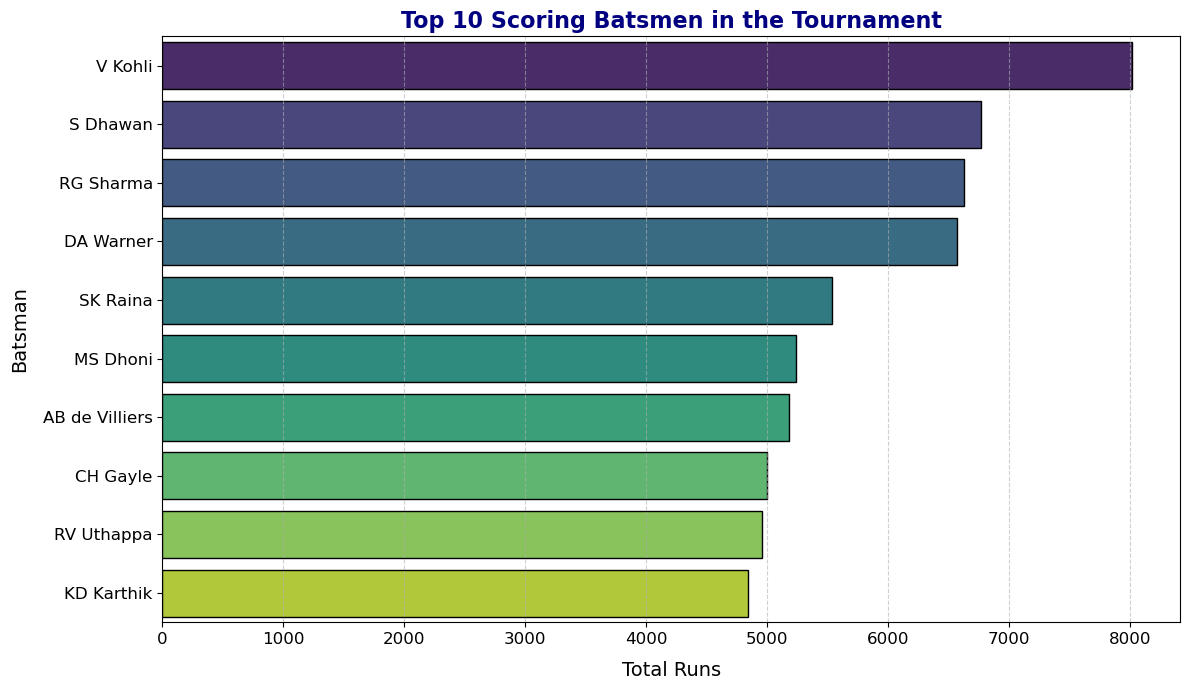

In [5]:
# Step 1: Group by batter and sum their runs
top_batsmen = (
    deliveries.groupby('batter')['batsman_runs']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Step 2: Plotting with a polished style
plt.figure(figsize=(12, 7))
sns.barplot(
    x=top_batsmen.values,
    y=top_batsmen.index,
    palette="viridis",
    edgecolor="black"
)

# Adding titles and labels
plt.title('Top 10 Scoring Batsmen in the Tournament', fontsize=16, weight='bold', color='navy')
plt.xlabel('Total Runs', fontsize=14, labelpad=10)
plt.ylabel('Batsman', fontsize=14, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding gridlines for clarity
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

# Display the plot
plt.show()

### Top 10 Bowlers with the highest number of wickets

C:\Users\Dolli\AppData\Local\Temp\ipykernel_7208\1326561828.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


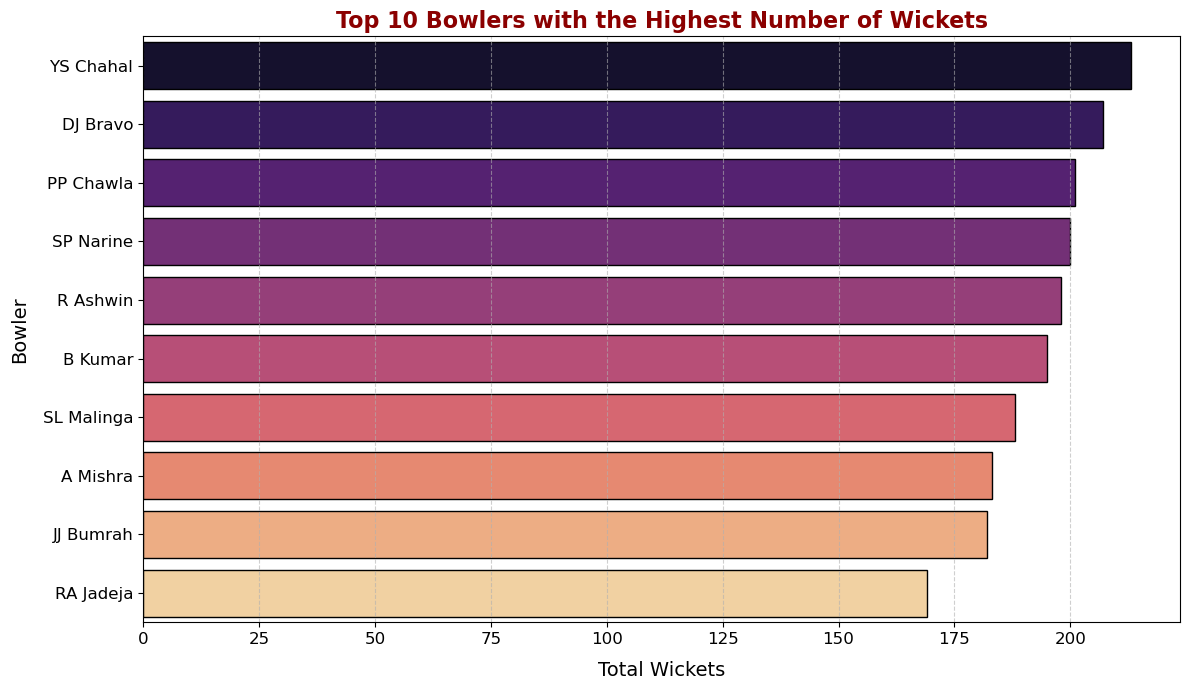

In [8]:
# Step 1: Filter for dismissals and group by bowler
top_bowlers = (
    deliveries[deliveries['is_wicket'] == 1]
    .groupby('bowler')['is_wicket']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Step 2: Plotting the data
plt.figure(figsize=(12, 7))
sns.barplot(
    x=top_bowlers.values,
    y=top_bowlers.index,
    palette="magma",
    edgecolor="black"
)

# Adding titles and labels
plt.title('Top 10 Bowlers with the Highest Number of Wickets', fontsize=16, weight='bold', color='darkred')
plt.xlabel('Total Wickets', fontsize=14, labelpad=10)
plt.ylabel('Bowler', fontsize=14, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding gridlines for clarity
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

# Display the plot
plt.show()

### TOP 10 Batsmen Strike Rate Analysis

C:\Users\Dolli\AppData\Local\Temp\ipykernel_7208\682759358.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


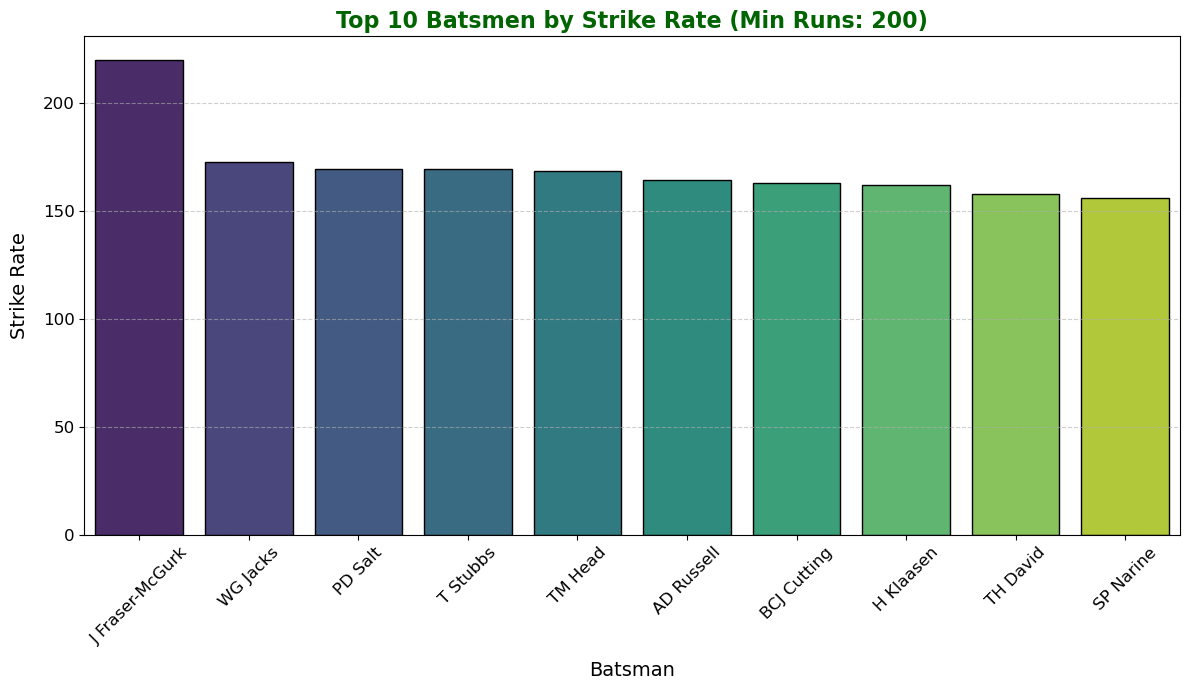

In [11]:
# Step 1: Calculate total runs and balls faced for each batsman
batsman_stats = deliveries.groupby('batter').agg(
    total_runs=('batsman_runs', 'sum'),
    balls_faced=('ball', 'count')
)

# Step 2: Add a strike rate column
batsman_stats['strike_rate'] = (batsman_stats['total_runs'] / batsman_stats['balls_faced']) * 100

# Step 3: Filter batsmen with a minimum run threshold (e.g., 200 runs)
target_run_threshold = 200
filtered_batsmen = batsman_stats[batsman_stats['total_runs'] >= target_run_threshold]

# Step 4: Sort by strike rate and pick top 10
top_strike_rate_batsmen = filtered_batsmen.sort_values('strike_rate', ascending=False).head(10)

# Step 5: Plotting the data
plt.figure(figsize=(12, 7))
sns.barplot(
    x=top_strike_rate_batsmen.index,
    y=top_strike_rate_batsmen['strike_rate'],
    palette="viridis",
    edgecolor="black"
)

# Adding titles and labels
plt.title('Top 10 Batsmen by Strike Rate (Min Runs: 200)', fontsize=16, weight='bold', color='darkgreen')
plt.xlabel('Batsman', fontsize=14, labelpad=10)
plt.ylabel('Strike Rate', fontsize=14, labelpad=10)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Adding gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Display the plot
plt.show()

### Top 15 players who have won most the Man of the Match trophies

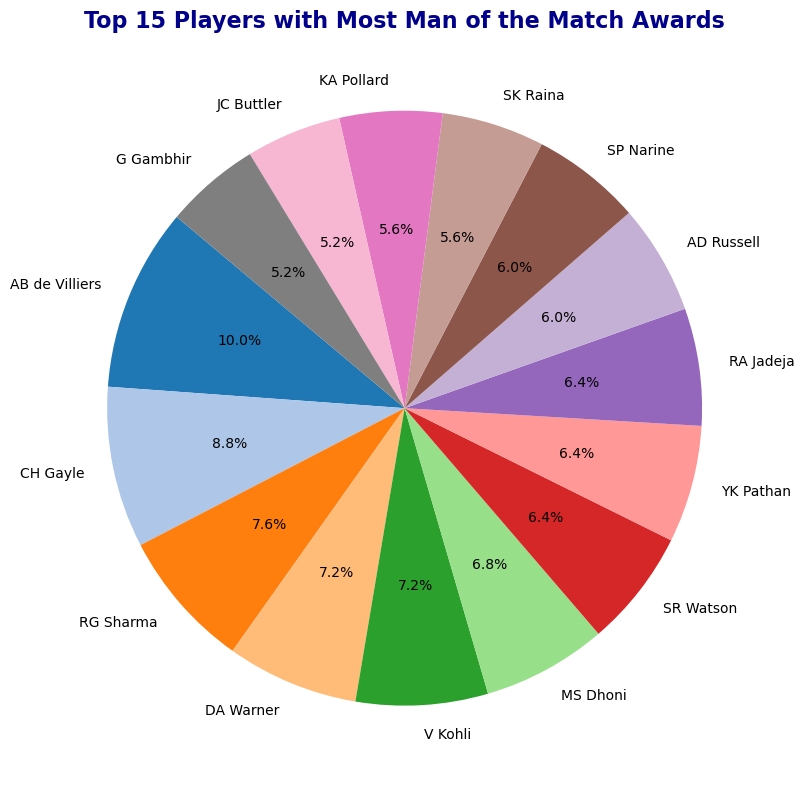

In [14]:
# Step 1: Count Man of the Match awards for each player
man_of_the_match_counts = matches['player_of_match'].value_counts().head(15)

# Step 2: Plot a Pie Chart
plt.figure(figsize=(12, 8))
plt.pie(
    man_of_the_match_counts.values,
    labels=man_of_the_match_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab20.colors
)

# Adding title
plt.title('Top 15 Players with Most Man of the Match Awards', fontsize=16, weight='bold', color='darkblue')
plt.tight_layout()

# Display the plot
plt.show()

### Top 10 Economy Rates for Bowlers Exceeding a Specific Ball Limit

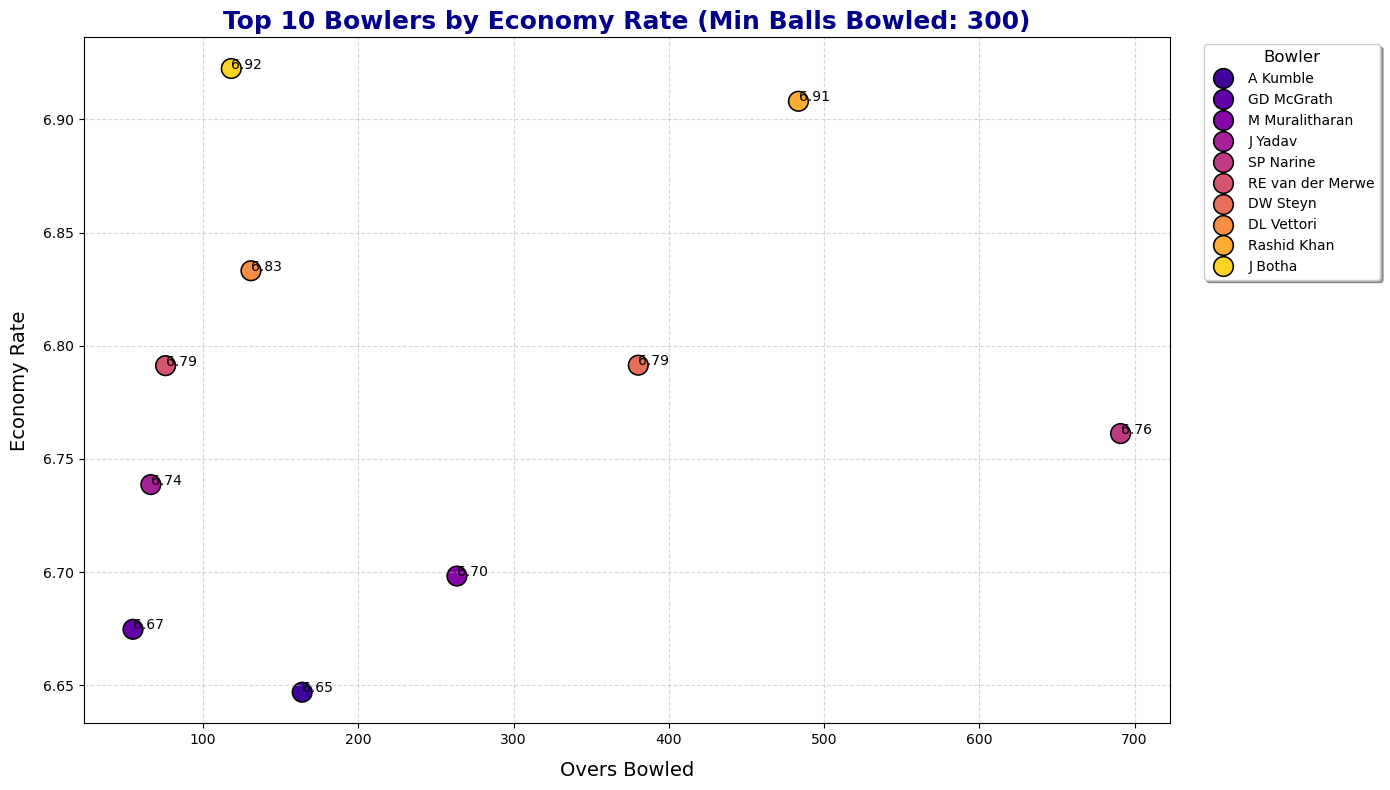

In [17]:
# Step 1: Calculate total runs conceded and balls bowled for each bowler
bowler_stats = deliveries.groupby('bowler').agg(
    total_runs_conceded=('total_runs', 'sum'),
    balls_bowled=('ball', 'count')
)

# Step 2: Add overs bowled and economy rate columns
bowler_stats['overs_bowled'] = bowler_stats['balls_bowled'] / 6
bowler_stats['economy_rate'] = bowler_stats['total_runs_conceded'] / bowler_stats['overs_bowled']

# Step 3: Filter bowlers who bowled more than a specific ball limit (e.g., 300 balls)
ball_limit = 300
filtered_bowlers = bowler_stats[bowler_stats['balls_bowled'] > ball_limit]

# Step 4: Sort by economy rate and pick the top 10
top_economy_bowlers = filtered_bowlers.sort_values('economy_rate').head(10)

# Step 5: Plotting the data
plt.figure(figsize=(14, 8))
scatter = sns.scatterplot(
    x=top_economy_bowlers['overs_bowled'],
    y=top_economy_bowlers['economy_rate'],
    hue=top_economy_bowlers.index,
    palette="plasma",
    s=200,
    edgecolor="black",
    legend="full"
)

# Adding titles and labels
plt.title('Top 10 Bowlers by Economy Rate (Min Balls Bowled: 300)', fontsize=18, weight='bold', color='darkblue')
plt.xlabel('Overs Bowled', fontsize=14, labelpad=10)
plt.ylabel('Economy Rate', fontsize=14, labelpad=10)

# Annotate the economy rate for each bowler
for i in range(top_economy_bowlers.shape[0]):
    plt.text(
        top_economy_bowlers['overs_bowled'].iloc[i] + 0.1,  # Slightly offset x
        top_economy_bowlers['economy_rate'].iloc[i],
        f"{top_economy_bowlers['economy_rate'].iloc[i]:.2f}",
        fontsize=10,
        color="black"
    )

# Enhance the legend
plt.legend(
    title='Bowler',
    title_fontsize=12,
    loc='upper right',
    bbox_to_anchor=(1.2, 1),
    fontsize=10,
    frameon=True,
    shadow=True
)

# Adding gridlines for clarity
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.tight_layout()

# Display the plot
plt.show()

### Best All-Rounder Performance

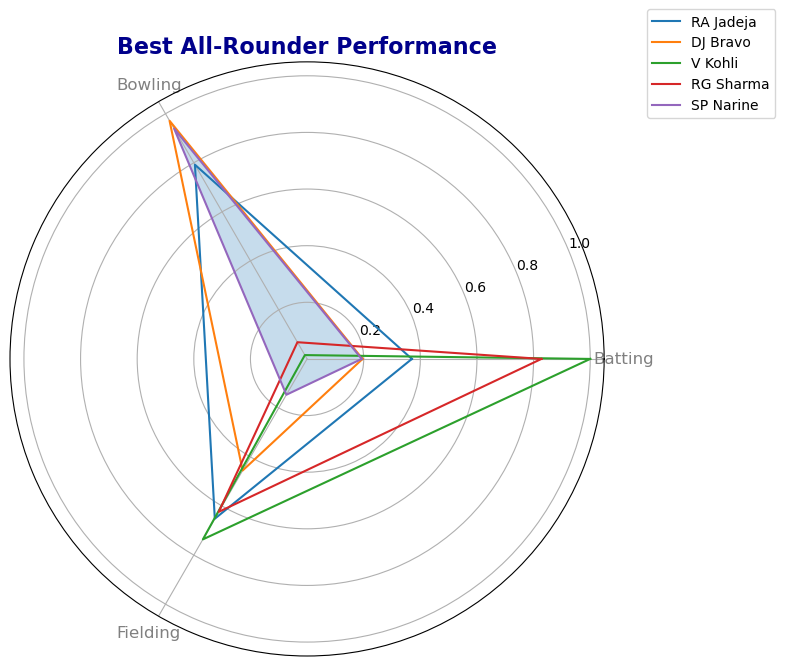

In [20]:
from math import pi

# Step 1: Calculate batting, bowling, and fielding stats
# Batting stats
batting_stats = deliveries.groupby('batter').agg(
    total_runs=('batsman_runs', 'sum'),
    balls_faced=('ball', 'count')
)
batting_stats['strike_rate'] = (batting_stats['total_runs'] / batting_stats['balls_faced']) * 100

# Bowling stats
bowling_stats = deliveries.groupby('bowler').agg(
    total_runs_conceded=('total_runs', 'sum'),
    balls_bowled=('ball', 'count'),
    wickets_taken=('is_wicket', 'sum')
)
bowling_stats['overs_bowled'] = bowling_stats['balls_bowled'] / 6
bowling_stats['economy_rate'] = bowling_stats['total_runs_conceded'] / bowling_stats['overs_bowled']

# Fielding stats
fielding_stats = deliveries[deliveries['dismissal_kind'].isin(['caught', 'run out'])].groupby('fielder').agg(
    fielding_dismissals=('dismissal_kind', 'count')
)

# Step 2: Combine all-rounder stats
all_rounders = pd.DataFrame({
    'batting_score': batting_stats['total_runs'] + batting_stats['strike_rate'] * 0.1,
    'bowling_score': bowling_stats['wickets_taken'] * 10 - bowling_stats['economy_rate'] * 2,
    'fielding_score': fielding_stats['fielding_dismissals']
}).fillna(0)

# Normalize scores for fair comparison
all_rounders['batting_score'] /= all_rounders['batting_score'].max()
all_rounders['bowling_score'] /= all_rounders['bowling_score'].max()
all_rounders['fielding_score'] /= all_rounders['fielding_score'].max()

# Calculate total performance score
all_rounders['total_score'] = (
    all_rounders['batting_score'] * 0.4 +
    all_rounders['bowling_score'] * 0.4 +
    all_rounders['fielding_score'] * 0.2
)

# Step 3: Select top all-rounders
top_all_rounders = all_rounders.sort_values('total_score', ascending=False).head(5)

# Step 4: Radar chart visualization
categories = ['Batting', 'Bowling', 'Fielding']
num_vars = len(categories)

# Create radar chart for top all-rounders
plt.figure(figsize=(8, 8))
for player in top_all_rounders.index:
    values = [
        top_all_rounders.loc[player, 'batting_score'],
        top_all_rounders.loc[player, 'bowling_score'],
        top_all_rounders.loc[player, 'fielding_score']
    ]
    values += values[:1]  # Repeat the first value to close the circle

    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]

    plt.polar(angles, values, label=player)

# Add labels and legend
plt.xticks(angles[:-1], categories, color='grey', fontsize=12)
plt.title('Best All-Rounder Performance', size=16, color='darkblue', weight='bold')
plt.fill(angles, values, alpha=0.25)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()

# Show the plot
plt.show()

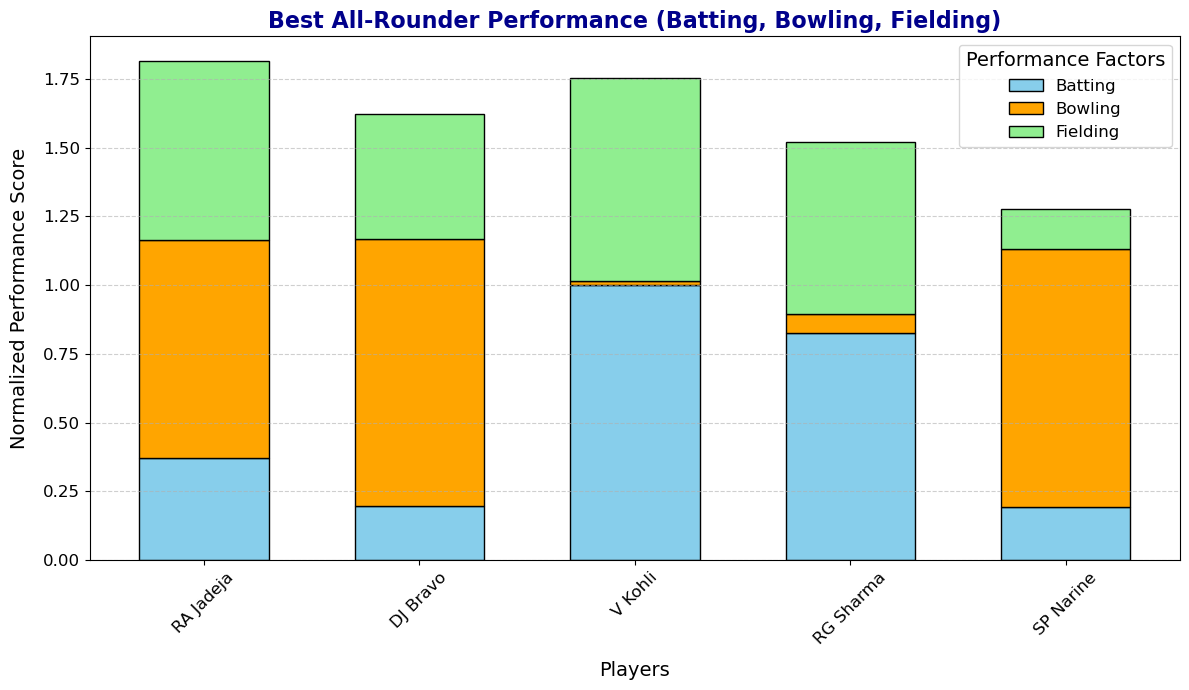

In [27]:
import numpy as np
# Step 1: Extract top all-rounder stats
top_all_rounders = all_rounders.sort_values('total_score', ascending=False).head(5)
players = top_all_rounders.index

# Step 2: Prepare data for stacked bar chart
batting_scores = top_all_rounders['batting_score']
bowling_scores = top_all_rounders['bowling_score']
fielding_scores = top_all_rounders['fielding_score']

# Step 3: Plot the Stacked Bar Chart
x = np.arange(len(players))  # Player positions on x-axis
width = 0.6  # Bar width

plt.figure(figsize=(12, 7))
plt.bar(x, batting_scores, width, label='Batting', color='skyblue', edgecolor='black')
plt.bar(x, bowling_scores, width, bottom=batting_scores, label='Bowling', color='orange', edgecolor='black')
plt.bar(x, fielding_scores, width, bottom=batting_scores + bowling_scores, label='Fielding', color='lightgreen', edgecolor='black')

# Adding labels and title
plt.title('Best All-Rounder Performance (Batting, Bowling, Fielding)', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Players', fontsize=14, labelpad=10)
plt.ylabel('Normalized Performance Score', fontsize=14, labelpad=10)
plt.xticks(x, players, fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(title='Performance Factors', fontsize=12, title_fontsize=14, loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Tight layout for cleaner appearance
plt.tight_layout()

# Display the plot
plt.show()

### Team-wise Analysis reports including both Batting and Bowling Average

In [30]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

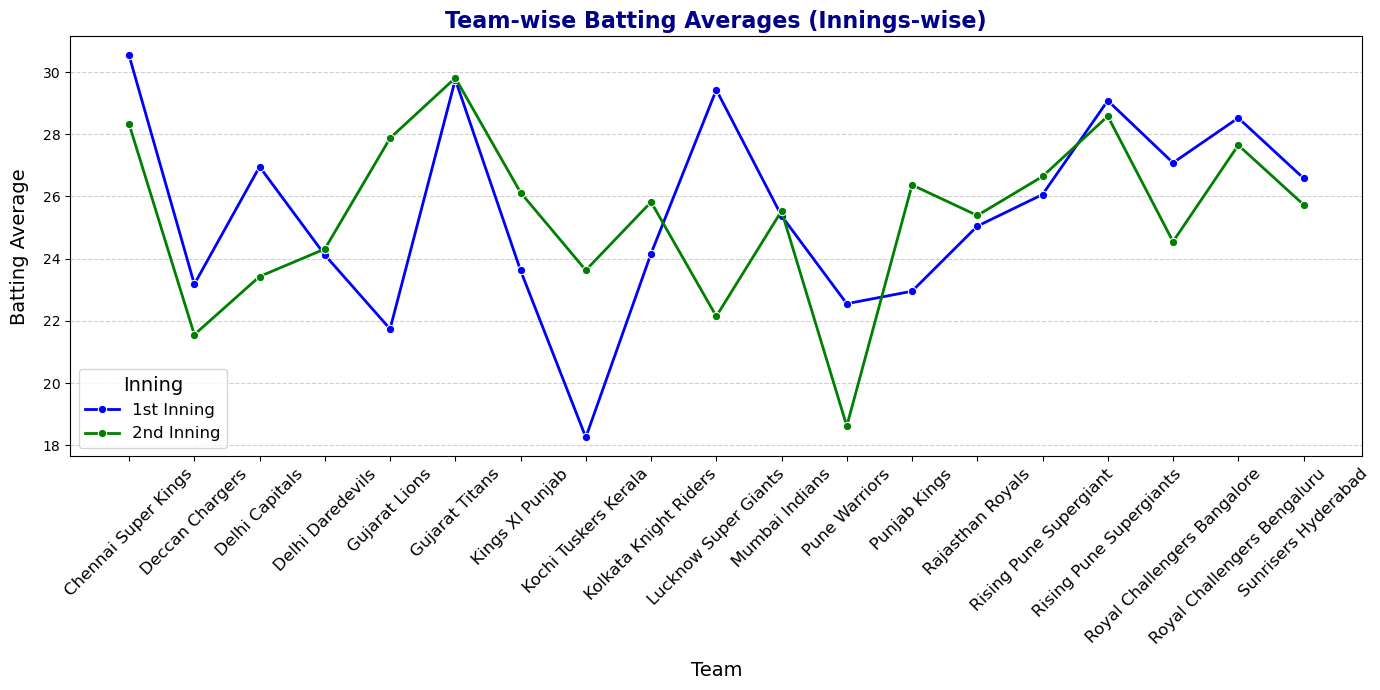

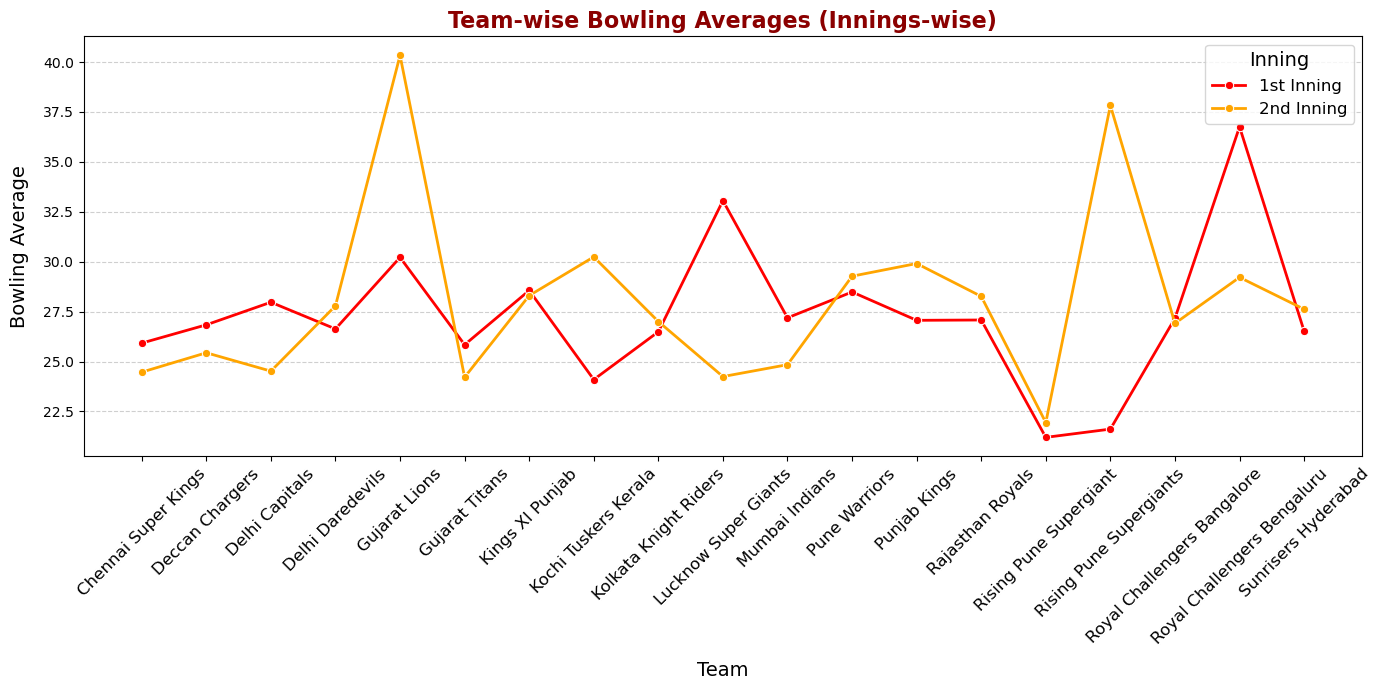

In [32]:
# Step 1: Calculate Batting Averages
batting_data = deliveries.groupby(['batting_team', 'inning']).agg(
    total_runs=('batsman_runs', 'sum'),
    total_wickets=('is_wicket', 'sum')
)
batting_data['batting_average'] = batting_data['total_runs'] / batting_data['total_wickets']
batting_data.reset_index(inplace=True)

# Replace infinite values with NaN
batting_data.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
# Drop rows with NaN values
batting_data.dropna(inplace=True)

# Step 2: Line Plot for Batting Averages
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=batting_data[batting_data['inning'] == 1],
    x='batting_team',
    y='batting_average',
    marker='o',
    label='1st Inning',
    color='blue',
    linewidth=2
)
sns.lineplot(
    data=batting_data[batting_data['inning'] == 2],
    x='batting_team',
    y='batting_average',
    marker='o',
    label='2nd Inning',
    color='green',
    linewidth=2
)
plt.title('Team-wise Batting Averages (Innings-wise)', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Team', fontsize=14, labelpad=10)
plt.ylabel('Batting Average', fontsize=14, labelpad=10)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Inning', fontsize=12, title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Step 3: Calculate Bowling Averages
bowling_data = deliveries.groupby(['bowling_team', 'inning']).agg(
    total_runs_conceded=('total_runs', 'sum'),
    total_wickets_taken=('is_wicket', 'sum')
)
bowling_data['bowling_average'] = bowling_data['total_runs_conceded'] / bowling_data['total_wickets_taken']
bowling_data.reset_index(inplace=True)

# Replace infinite values with NaN
bowling_data.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
# Drop rows with NaN values
bowling_data.dropna(inplace=True)

# Step 4: Line Plot for Bowling Averages
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=bowling_data[bowling_data['inning'] == 1],
    x='bowling_team',
    y='bowling_average',
    marker='o',
    label='1st Inning',
    color='red',
    linewidth=2
)
sns.lineplot(
    data=bowling_data[bowling_data['inning'] == 2],
    x='bowling_team',
    y='bowling_average',
    marker='o',
    label='2nd Inning',
    color='orange',
    linewidth=2
)
plt.title('Team-wise Bowling Averages (Innings-wise)', fontsize=16, weight='bold', color='darkred')
plt.xlabel('Team', fontsize=14, labelpad=10)
plt.ylabel('Bowling Average', fontsize=14, labelpad=10)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Inning', fontsize=12, title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Win/Loss Analysis by Runs or Wickets for Each Team

<Figure size 1400x800 with 0 Axes>

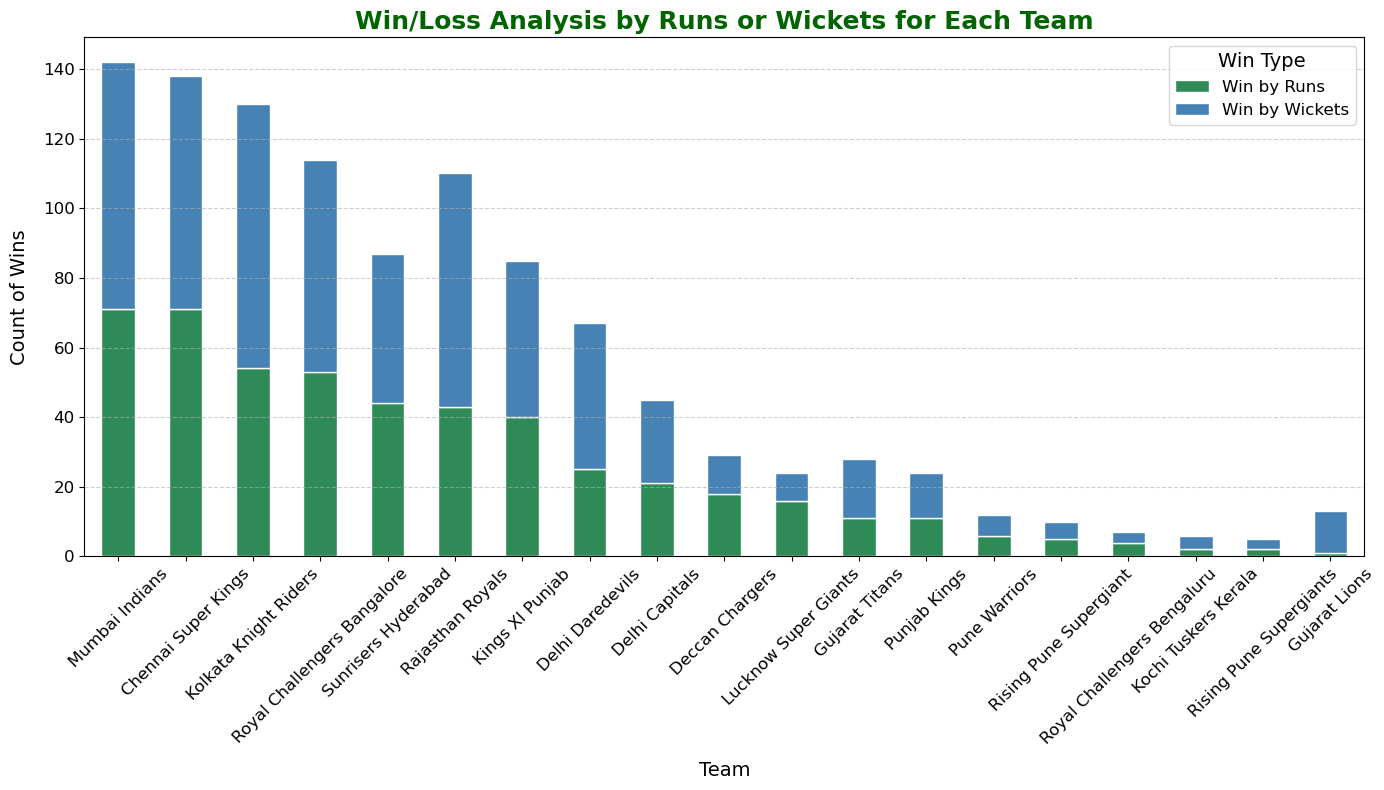

In [35]:
# Step 1: Create a win/loss dataset from matches.csv
win_loss_data = matches.groupby(['winner', 'result']).size().unstack(fill_value=0)

# Step 2: Renaming columns for better clarity
win_loss_data = win_loss_data.rename(columns={'runs': 'Win by Runs', 'wickets': 'Win by Wickets'})

# Step 3: Sort the data for better visualization
win_loss_data = win_loss_data.sort_values(['Win by Runs', 'Win by Wickets'], ascending=False)

# Step 4: Plotting the stacked bar chart
plt.figure(figsize=(14, 8))
win_loss_data[['Win by Runs', 'Win by Wickets']].plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    color=['#2E8B57', '#4682B4'],
    edgecolor='white'
)

# Step 5: Enhancing the visualization
plt.title('Win/Loss Analysis by Runs or Wickets for Each Team', fontsize=18, weight='bold', color='darkgreen')
plt.xlabel('Team', fontsize=14, labelpad=10)
plt.ylabel('Count of Wins', fontsize=14, labelpad=10)
plt.xticks(rotation=45, fontsize=12, weight='light')
plt.yticks(fontsize=12, weight='light')
plt.legend(title='Win Type', fontsize=12, title_fontsize=14)

# Subtle gridlines for aesthetics
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Layout adjustment
plt.tight_layout()

# Display the plot
plt.show()

### Head-to-head match analysis between IPL teams.

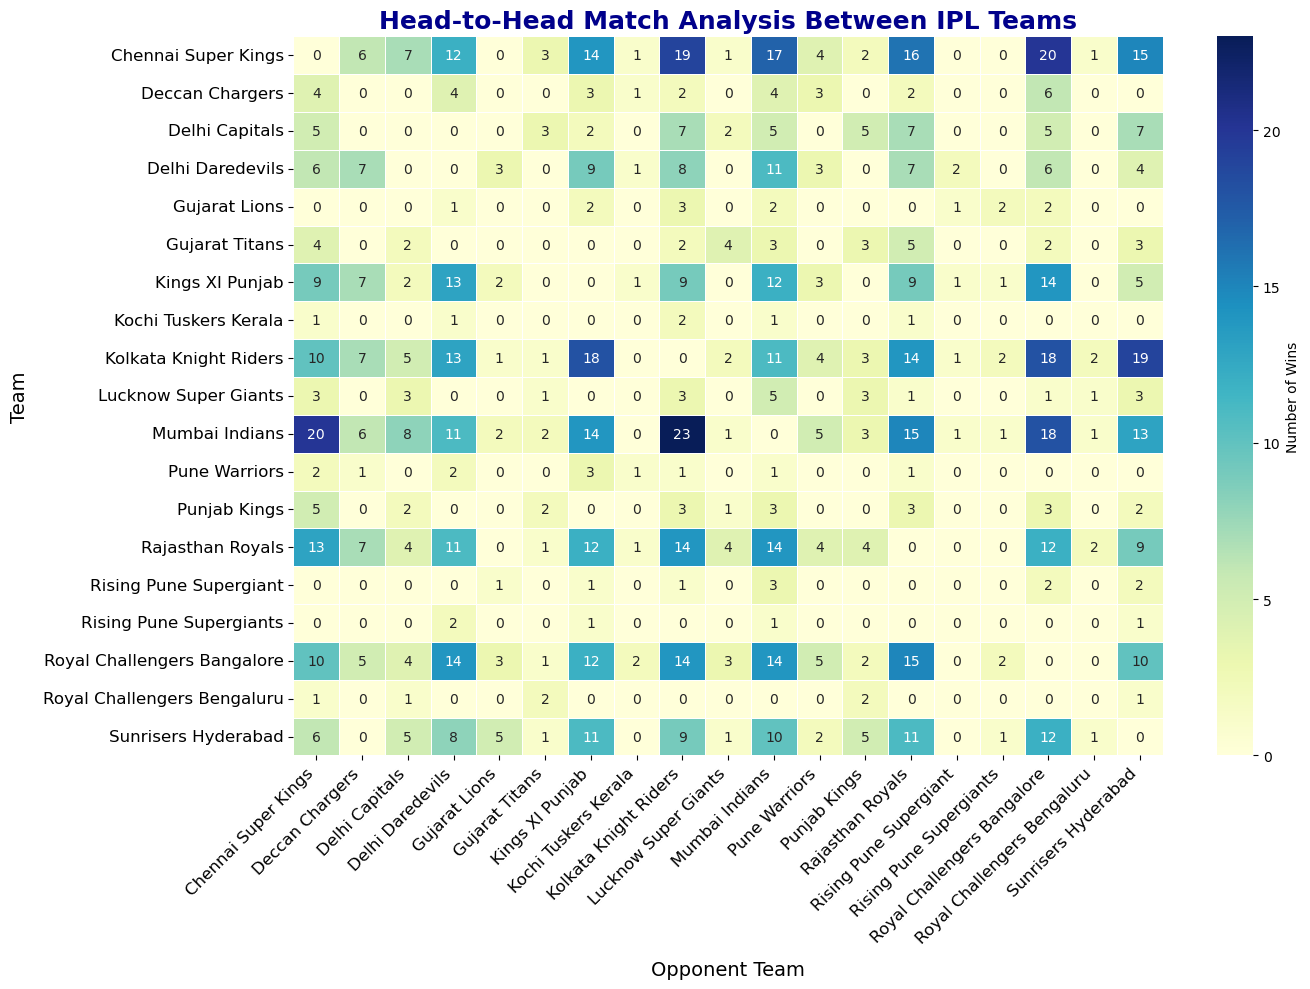

In [38]:
# Step 1: Clean team names (strip spaces, handle inconsistencies)
matches['team1'] = matches['team1'].str.strip()
matches['team2'] = matches['team2'].str.strip()
matches['winner'] = matches['winner'].str.strip()

# Step 2: Create an empty DataFrame for head-to-head results
teams = sorted(set(matches['team1']).union(set(matches['team2'])))
head_to_head = pd.DataFrame(0, index=teams, columns=teams)

# Step 3: Populate the head-to-head DataFrame
for _, row in matches.iterrows():
    if row['winner'] in teams:  # Ensure winner is a valid team
        if row['winner'] == row['team1']:
            head_to_head.at[row['team1'], row['team2']] += 1
        elif row['winner'] == row['team2']:
            head_to_head.at[row['team2'], row['team1']] += 1

# Step 4: Plotting the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    head_to_head,
    annot=True,
    fmt="d",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={"label": "Number of Wins"}
)

# Adding titles and labels
plt.title('Head-to-Head Match Analysis Between IPL Teams', fontsize=18, weight='bold', color='darkblue')
plt.xlabel('Opponent Team', fontsize=14, labelpad=10)
plt.ylabel('Team', fontsize=14, labelpad=10)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.yticks(fontsize=12)

# Tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()